In [2]:
from datetime import datetime, date

#!pip install bigxml
from bigxml import Parser, xml_handle_element, xml_handle_text
#!pip install matplotlib
import matplotlib.pyplot as plt

In [24]:
SITE_DAYS = 2980  # кол-во дней существования сайта (примерно)

In [25]:
### ВИЗУАЛИЗАЦИЯ ПО ЧАСАМ ###
hours = {k: 0 for k in range(0, 24)}

In [26]:
@xml_handle_element('posts', 'row')
def handle_row(node):
    if node.attributes['PostTypeId'] == '1':  # вопрос
        hour = datetime.strptime(node.attributes['CreationDate'], '%Y-%m-%dT%H:%M:%S.%f').hour
    else:
        hour = -1
    yield hour

In [28]:
with open('../Posts.xml', 'rb') as f:
    for hour in Parser(f).iter_from(handle_row):
        if hour != -1:
            hours[hour] += 1

In [29]:
hours = {k: v / SITE_DAYS for k, v in hours.items()}

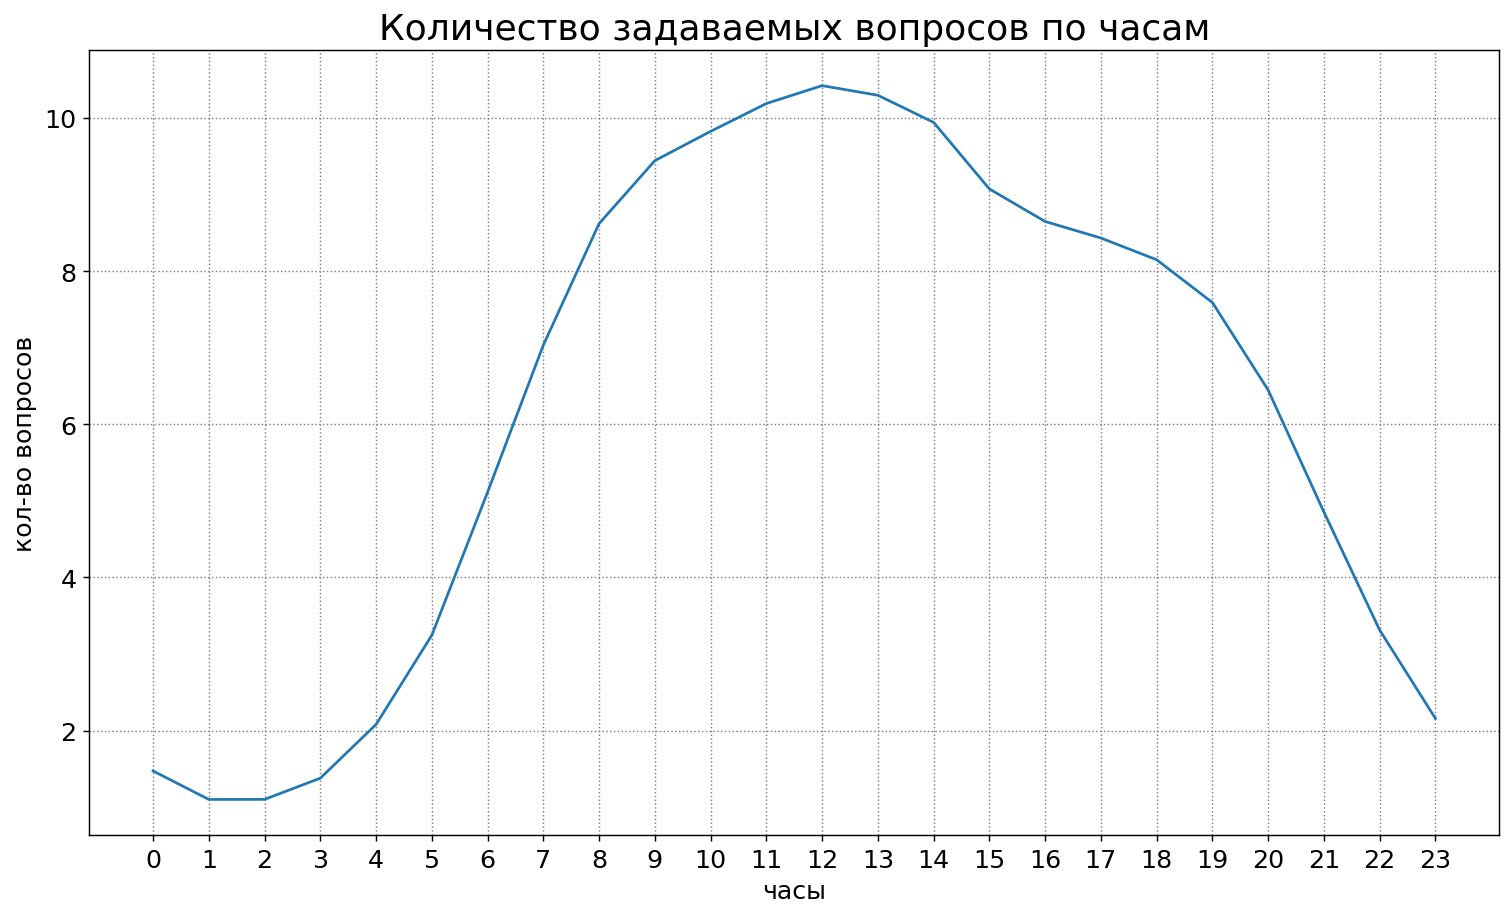

In [30]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.dpi = 130

ax.plot(hours.values())

plt.title(f'Количество задаваемых вопросов по часам', fontsize=20)
plt.xlabel('', fontsize=16)

plt.xticks(list(range(0, 24)))

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')

plt.ylabel('кол-во вопросов', fontsize=14)
plt.xlabel('часы', fontsize=14)
plt.tick_params(labelsize=14)

plt.show()

In [31]:
### ВИЗУАЛИЗАЦИЯ ПО ДНЯМ НЕДЕЛИ ###
weekdays = {k: 0 for k in range(0, 7)}

In [32]:
@xml_handle_element('posts', 'row')
def handle_row(node):
    if node.attributes['PostTypeId'] == '1':  # вопрос
        date_obj = datetime.strptime(node.attributes['CreationDate'], '%Y-%m-%dT%H:%M:%S.%f')
        weekday = date(date_obj.year, date_obj.month, date_obj.day).weekday()
    else:
        weekday = -1
    yield weekday

In [33]:
with open('../Posts.xml', 'rb') as f:
    for weekday in Parser(f).iter_from(handle_row):
        if weekday != -1:
            weekdays[weekday] += 1

In [34]:
weekdays = {k: v / (SITE_DAYS / 7) for k, v in weekdays.items()}

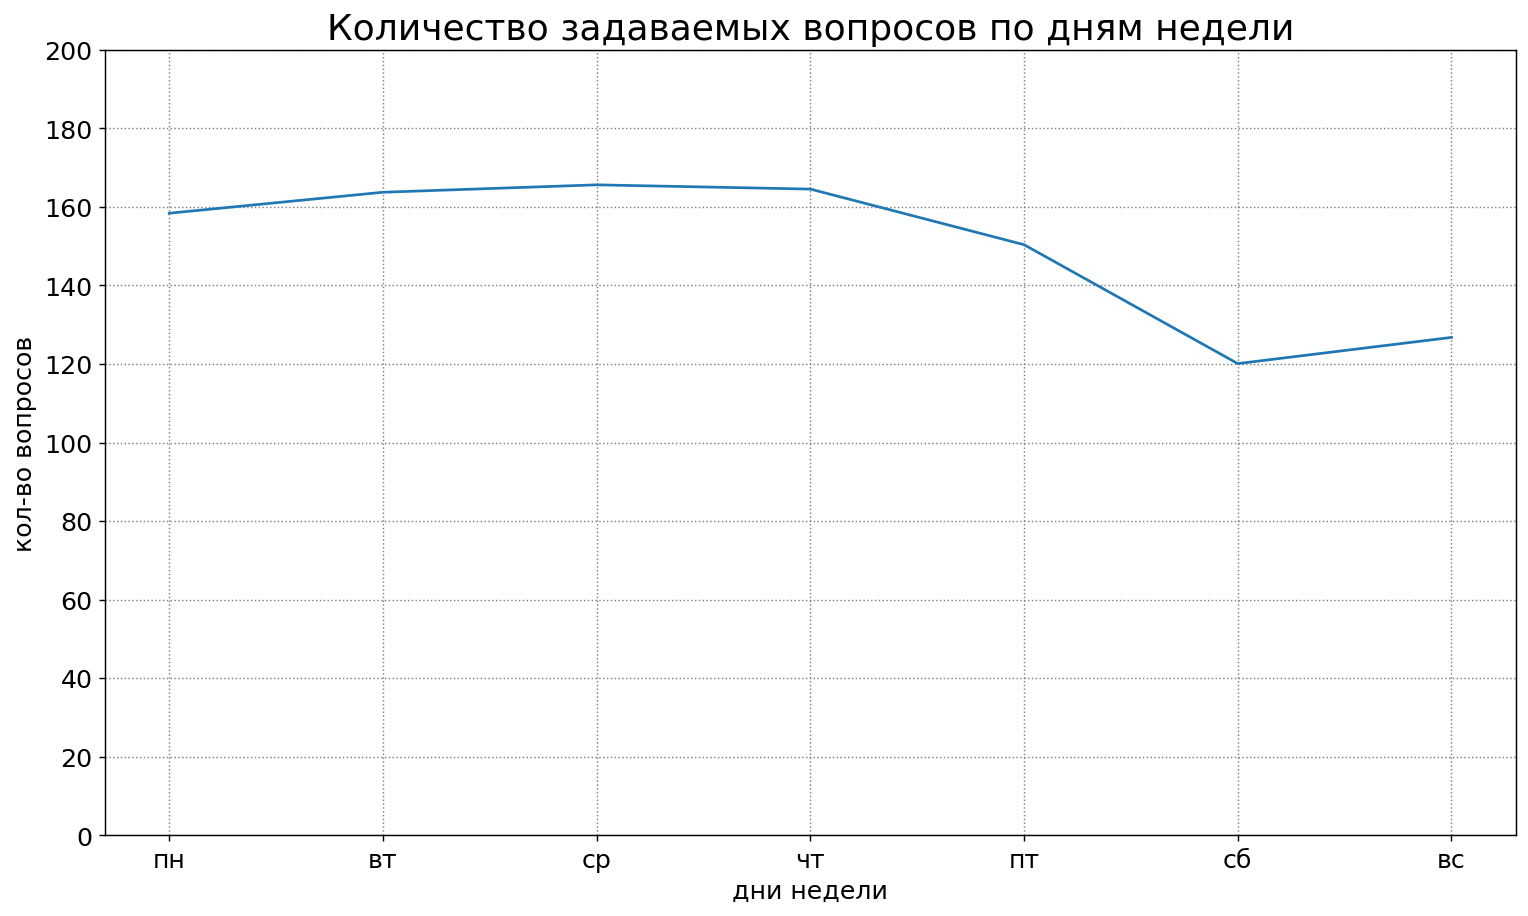

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.dpi = 130

ax.plot(weekdays.values())

plt.title(f'Количество задаваемых вопросов по дням недели', fontsize=20)
plt.xlabel('', fontsize=16)

ax.set_yticks(range(0, 220, 20))
ax.set_xticks(range(0, 7))
ax.set_xticklabels(['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')

plt.ylabel('кол-во вопросов', fontsize=14)
plt.xlabel('дни недели', fontsize=14)
plt.tick_params(labelsize=14)

plt.show()

In [5]:
### ВИЗУАЛИЗАЦИЯ ПО ДНЯМ ГОДА ###
yeardays = {k: 0 for k in range(1, 367)}
SITE_YEARS = 8 + 1/(12/2)  # 8 лет 2 месяца
CURRENT_YEAR = datetime.now().year

In [6]:
@xml_handle_element('posts', 'row')
def handle_row(node):
    if node.attributes['PostTypeId'] == '1':  # вопрос
        date_obj = datetime.strptime(node.attributes['CreationDate'], '%Y-%m-%dT%H:%M:%S.%f')
        if date_obj.year == CURRENT_YEAR:
            yearday = -1
        else:
            yearday = date_obj.timetuple().tm_yday
    else:
        yearday = -1
    yield yearday

In [7]:
with open('../Posts.xml', 'rb') as f:
    for yearday in Parser(f).iter_from(handle_row):
        if yearday != -1:
            yeardays[yearday] += 1

In [8]:
yeardays = {k: v / SITE_YEARS for k, v in yeardays.items() if k != 366}

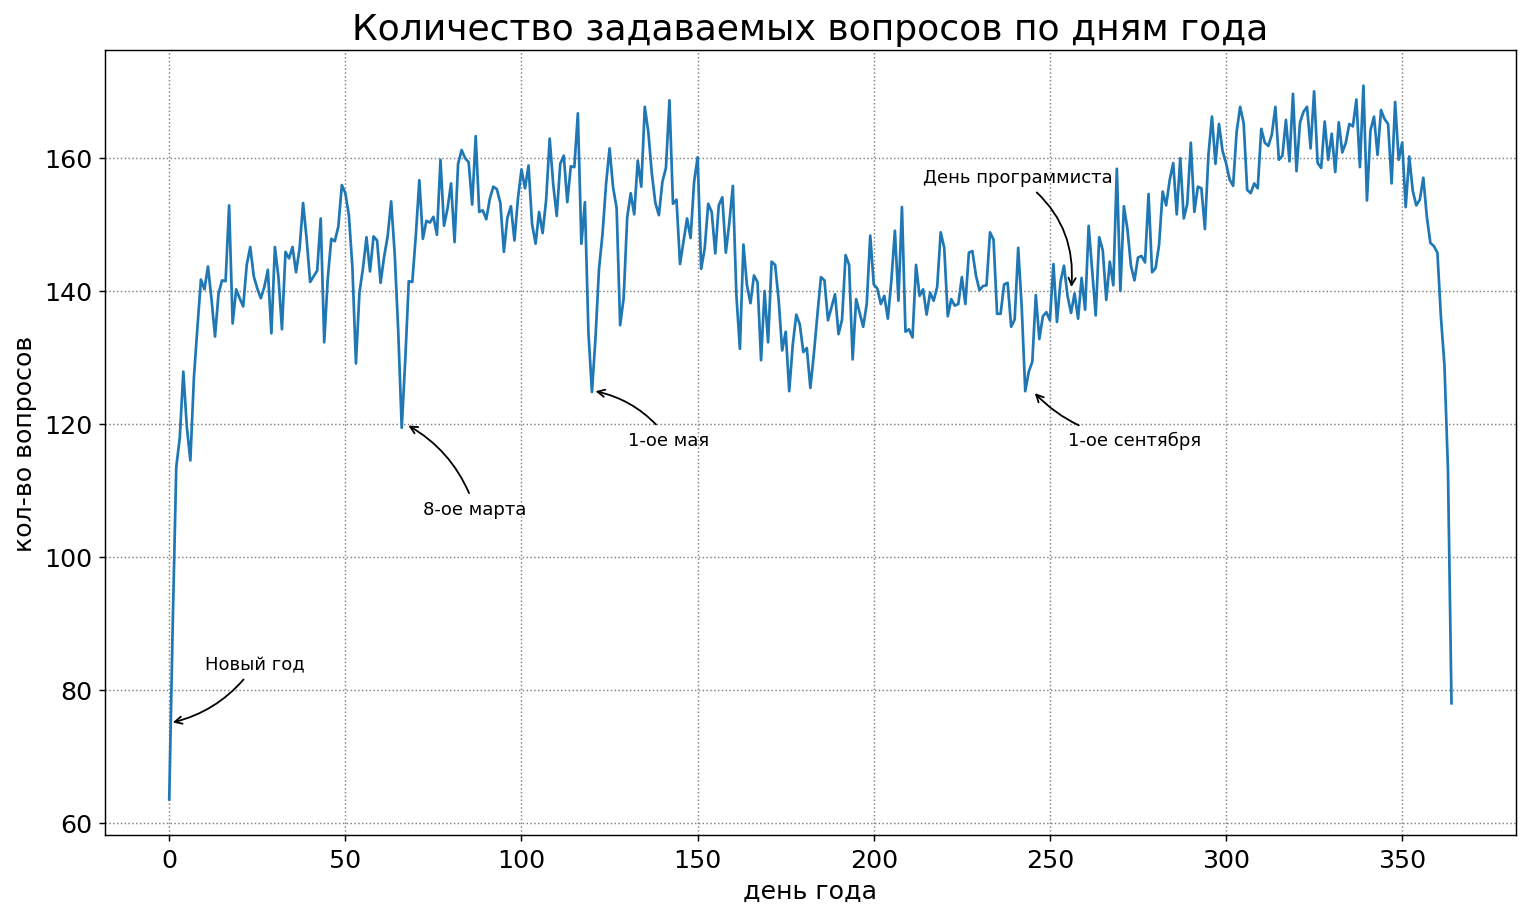

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.dpi = 130

ax.plot(yeardays.values())

ax.annotate('Новый год', xy=(0, 75), xycoords='data',
            xytext=(20, 30), textcoords='offset points',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3,rad=-0.2'})

ax.annotate('8-ое марта', xy=(67, 120), xycoords='data',
            xytext=(10, -50), textcoords='offset points',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3,rad=0.2'})

ax.annotate('1-ое мая', xy=(120, 125), xycoords='data',
            xytext=(20, -30), textcoords='offset points',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3,rad=0.2'})

ax.annotate('1-ое сентября', xy=(245, 125), xycoords='data',
            xytext=(20, -30), textcoords='offset points',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3,rad=-0.2'})

ax.annotate('День программиста', xy=(256, 140), xycoords='data',
            xytext=(-82, 60), textcoords='offset points',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3,rad=-0.3'})

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')

plt.title(f'Количество задаваемых вопросов по дням года', fontsize=20)
plt.xlabel('', fontsize=16)

plt.ylabel('кол-во вопросов', fontsize=14)
plt.xlabel('день года', fontsize=14)
plt.tick_params(labelsize=14)

plt.show()